# Importing Libraries

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go 
from datetime import datetime 

# Reading Data

In [135]:
df = pd.read_csv('AB_NYC_2019.csv')

# Data Analysis

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [137]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,41,-74,Private room,149,1,9,2018-10-19,0,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,41,-74,Entire home/apt,225,1,45,2019-05-21,0,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,41,-74,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,41,-74,Entire home/apt,89,1,270,2019-07-05,5,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,41,-74,Entire home/apt,80,10,9,2018-11-19,0,1,0


In [138]:
# To see if there is duplicated rows
df.duplicated().sum()

0

In [139]:
# To see if there is empty values
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [140]:
# Drop columns not needed in analysis
df = df.drop(columns=['id','name','host_name'])

In [141]:
# To fill empty values
df.last_review = pd.to_datetime(df.last_review)
df.reviews_per_month = df.reviews_per_month.fillna(0)
df.last_review= df.last_review.fillna(df.last_review.min())

In [142]:
pd.options.display.float_format = '{:,.0f}'.format
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,"48,895","48,895","48,895","48,895","48,895","48,895","48,895","48,895","48,895"
mean,"67,620,011",41,-74,153,7,23,1,7,113
std,"78,610,967",0,0,240,21,45,2,33,132
min,"2,438",40,-74,0,1,0,0,1,0
25%,"7,822,033",41,-74,69,1,1,0,1,0
50%,"30,793,816",41,-74,106,3,5,0,1,45
75%,"107,434,423",41,-74,175,5,24,2,2,227
max,"274,321,313",41,-74,"10,000","1,250",629,58,327,365


In [143]:
df.describe(include='object')

,neighbourhood_group,neighbourhood,room_type
count,48895,48895,48895
unique,5,221,3
top,Manhattan,Williamsburg,Entire home/apt
freq,21661,3920,25409


# Univariate Analysis

In [144]:
x = df.neighbourhood_group.value_counts()
fig = px.pie(x, values=x.values, names= x.index, title="Percentage of total listing in each neighbourhood",width=800)
fig.show()

In [145]:
z = df.neighbourhood.value_counts()
px.histogram(z,x=z.index,y=z.values,text_auto=True,title="No. of listings in each neighbourhood").update_layout(xaxis_title="Neighbourhood", yaxis_title="No of Rooms")

In [146]:
x = df.room_type.value_counts()
fig = px.pie(x, values=x.values, names= x.index, title="Room types in listing",width=800)
fig.show()

# Multivariate Analysis

In [147]:
px.histogram(df,x="neighbourhood_group",color="room_type",barmode='group',text_auto=True,title="No of listing with their type in each neighbourhood group")

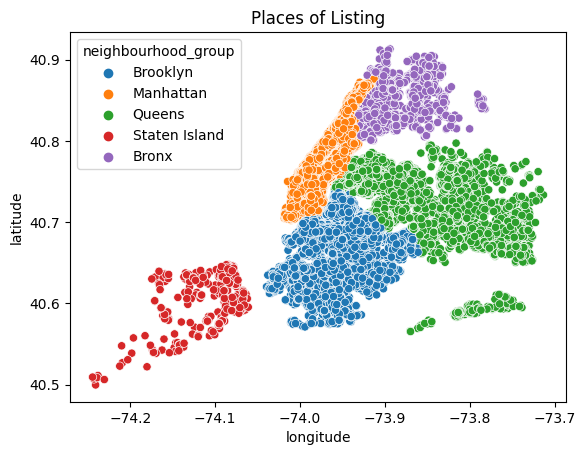

In [148]:
fig = sns.scatterplot(df,y = 'latitude',x='longitude',hue='neighbourhood_group').set(title ='Places of Listing');


In [150]:
# Distance between center of New York and listing
import geopy.distance

coords_1 = (40.730610,-73.935242)

def distance_from_center(x):
  coords_2 = (x['latitude'],x['longitude'])
  return geopy.distance.geodesic(coords_1, coords_2).km


In [151]:
df['distance'] = df[['latitude','longitude']].apply(distance_from_center,axis = 1)

In [157]:
px.scatter(df,x='distance',y='price')

<ipython-input-153-db93604bff16>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



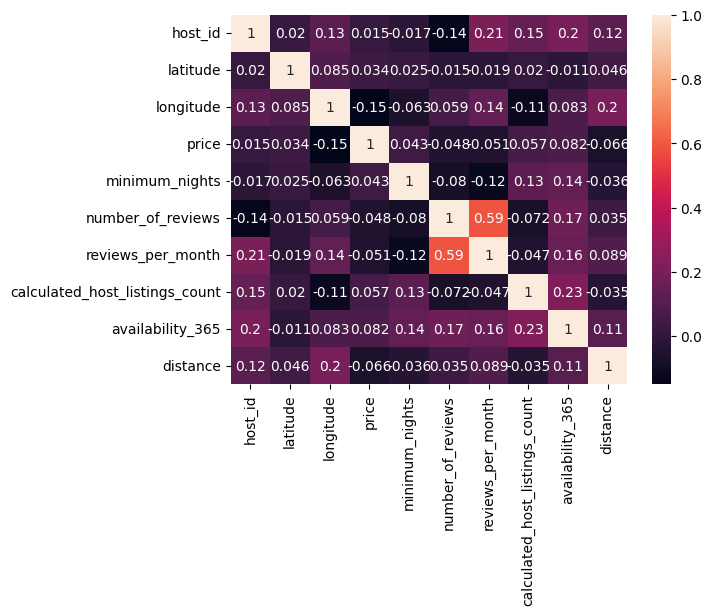

In [153]:
sns.heatmap(df.corr(),annot=True);
